In [84]:
import yaml
import os

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [86]:
# Load the configuration file
with open('../config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

# Access the settings
project_folder = config['projectFolder']
df_path = os.path.join(project_folder, config['rawDataFile'])
df = pd.read_csv(df_path)

# Display the first few rows
df.head()

,Date,Temp1,FlowC1,Temp2,TempC1,Temp3,TempC2,TempC3,Temp4,PressureC1,...,TempC9,FlowC2,Temp9,Temp10,FlowC3,FlowC4,Temp11,Temp12,VapourPressure,Yield
0,21/08/2000,139.9857,432.0636,377.8119,100.2204,492.1353,490.1459,180.5578,187.4331,215.0627,...,86.6133,69.9017,461.2371,513.9653,8.6279,10.5988,30.8983,489.9900,32.5026,69.400623
1,23/08/2000,131.0470,487.4029,371.3060,100.2297,482.2100,480.3128,172.6575,179.5089,205.0999,...,97.6100,69.6900,450.3000,504.5145,8.7662,10.7560,31.9099,480.2888,34.8598,66.532666
2,26/08/2000,118.2666,437.3516,378.4483,100.3084,488.7266,487.0040,165.9400,172.9262,205.0304,...,88.4967,70.5867,458.8101,508.9997,8.5319,10.5737,29.9165,486.6190,32.1666,71.102193
3,29/08/2000,118.1769,481.8314,378.0028,95.5766,493.1481,491.1137,167.2085,174.2338,205.2561,...,95.3483,70.2167,462.5252,514.1794,8.6260,10.6695,30.6229,491.1304,30.4064,69.793481
4,30/08/2000,120.7891,412.6471,377.8871,92.9052,490.2486,488.6641,167.0326,173.9681,205.0883,...,82.9533,69.6567,460.7509,511.0948,8.5939,10.4922,29.4977,487.6475,30.9238,71.489516


In [87]:
## Verify the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            253 non-null    object 
 1   Temp1           253 non-null    float64
 2   FlowC1          253 non-null    float64
 3   Temp2           253 non-null    float64
 4   TempC1          253 non-null    float64
 5   Temp3           253 non-null    float64
 6   TempC2          253 non-null    float64
 7   TempC3          253 non-null    float64
 8   Temp4           253 non-null    float64
 9   PressureC1      253 non-null    float64
 10  Temp5           253 non-null    float64
 11  Temp6           253 non-null    float64
 12  OC1             253 non-null    float64
 13  Temp7           253 non-null    float64
 14  Temp8           253 non-null    float64
 15  TempC9          253 non-null    float64
 16  FlowC2          253 non-null    float64
 17  Temp9           253 non-null    flo

In [88]:
## Numeric features analysis
df.describe()

,Temp1,FlowC1,Temp2,TempC1,Temp3,TempC2,TempC3,Temp4,PressureC1,Temp5,...,TempC9,FlowC2,Temp9,Temp10,FlowC3,FlowC4,Temp11,Temp12,VapourPressure,Yield
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,132.441662,308.878978,372.272493,101.924035,482.471458,480.821533,175.194760,181.729203,238.590831,478.745147,...,62.040853,73.341751,460.669378,497.979526,6.671970,8.227488,21.802075,480.328241,36.649317,69.400623
std,12.026306,83.406894,14.757763,15.093537,18.548515,18.580542,13.943948,14.067880,13.924949,18.536614,...,16.909747,3.249773,17.611326,20.487860,1.168602,1.549983,5.200383,18.562388,6.841153,1.345877
min,111.025900,174.742800,318.447000,75.584700,420.777700,419.017500,119.214000,124.599400,199.823400,418.619400,...,34.510000,61.136700,400.316400,432.448300,4.617000,5.847000,12.885700,419.427400,25.156000,65.203801
25%,121.602000,235.286300,362.766400,88.979000,471.457000,469.819900,169.516300,176.270900,225.830200,467.591100,...,46.880000,71.267800,449.230800,485.878600,5.577700,6.867600,17.554300,468.911600,31.980800,68.744615
50%,130.170300,292.910900,373.380100,100.220400,483.847800,482.257700,175.550900,182.210200,241.410400,480.201800,...,58.740000,73.156700,462.067000,498.954700,6.523900,7.992700,20.480300,482.054100,34.849700,69.440647
75%,140.520900,370.814200,383.123900,116.323200,495.428300,493.491500,183.770700,190.471500,250.039600,490.862100,...,75.180000,74.696700,471.448400,513.039300,7.584500,9.901000,25.518200,492.791500,40.639900,70.125880
max,168.040200,505.668100,406.740000,132.199400,528.080700,526.392000,229.411100,235.624400,254.590000,524.787700,...,99.982900,83.593300,507.314900,547.132800,8.847300,10.756000,35.525400,526.143700,64.313500,73.471963


In [89]:
# Check for missing values
print(df.isnull().sum())

Date              0
Temp1             0
FlowC1            0
Temp2             0
TempC1            0
Temp3             0
TempC2            0
TempC3            0
Temp4             0
PressureC1        0
Temp5             0
Temp6             0
OC1               0
Temp7             0
Temp8             0
TempC9            0
FlowC2            0
Temp9             0
Temp10            0
FlowC3            0
FlowC4            0
Temp11            0
Temp12            0
VapourPressure    0
Yield             0
dtype: int64


In [90]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [91]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [92]:
#Plot yield vs time
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Create the plot
fig = px.line(df, x='Date', y='Yield', title='Yield vs Time', markers=True)

# Customize the layout (optional)
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Yield',
    template='plotly_white',  # Use a clean template
    hovermode='x unified'  # Show hover information for all points on the x-axis
)

# Show the plot
fig.show()


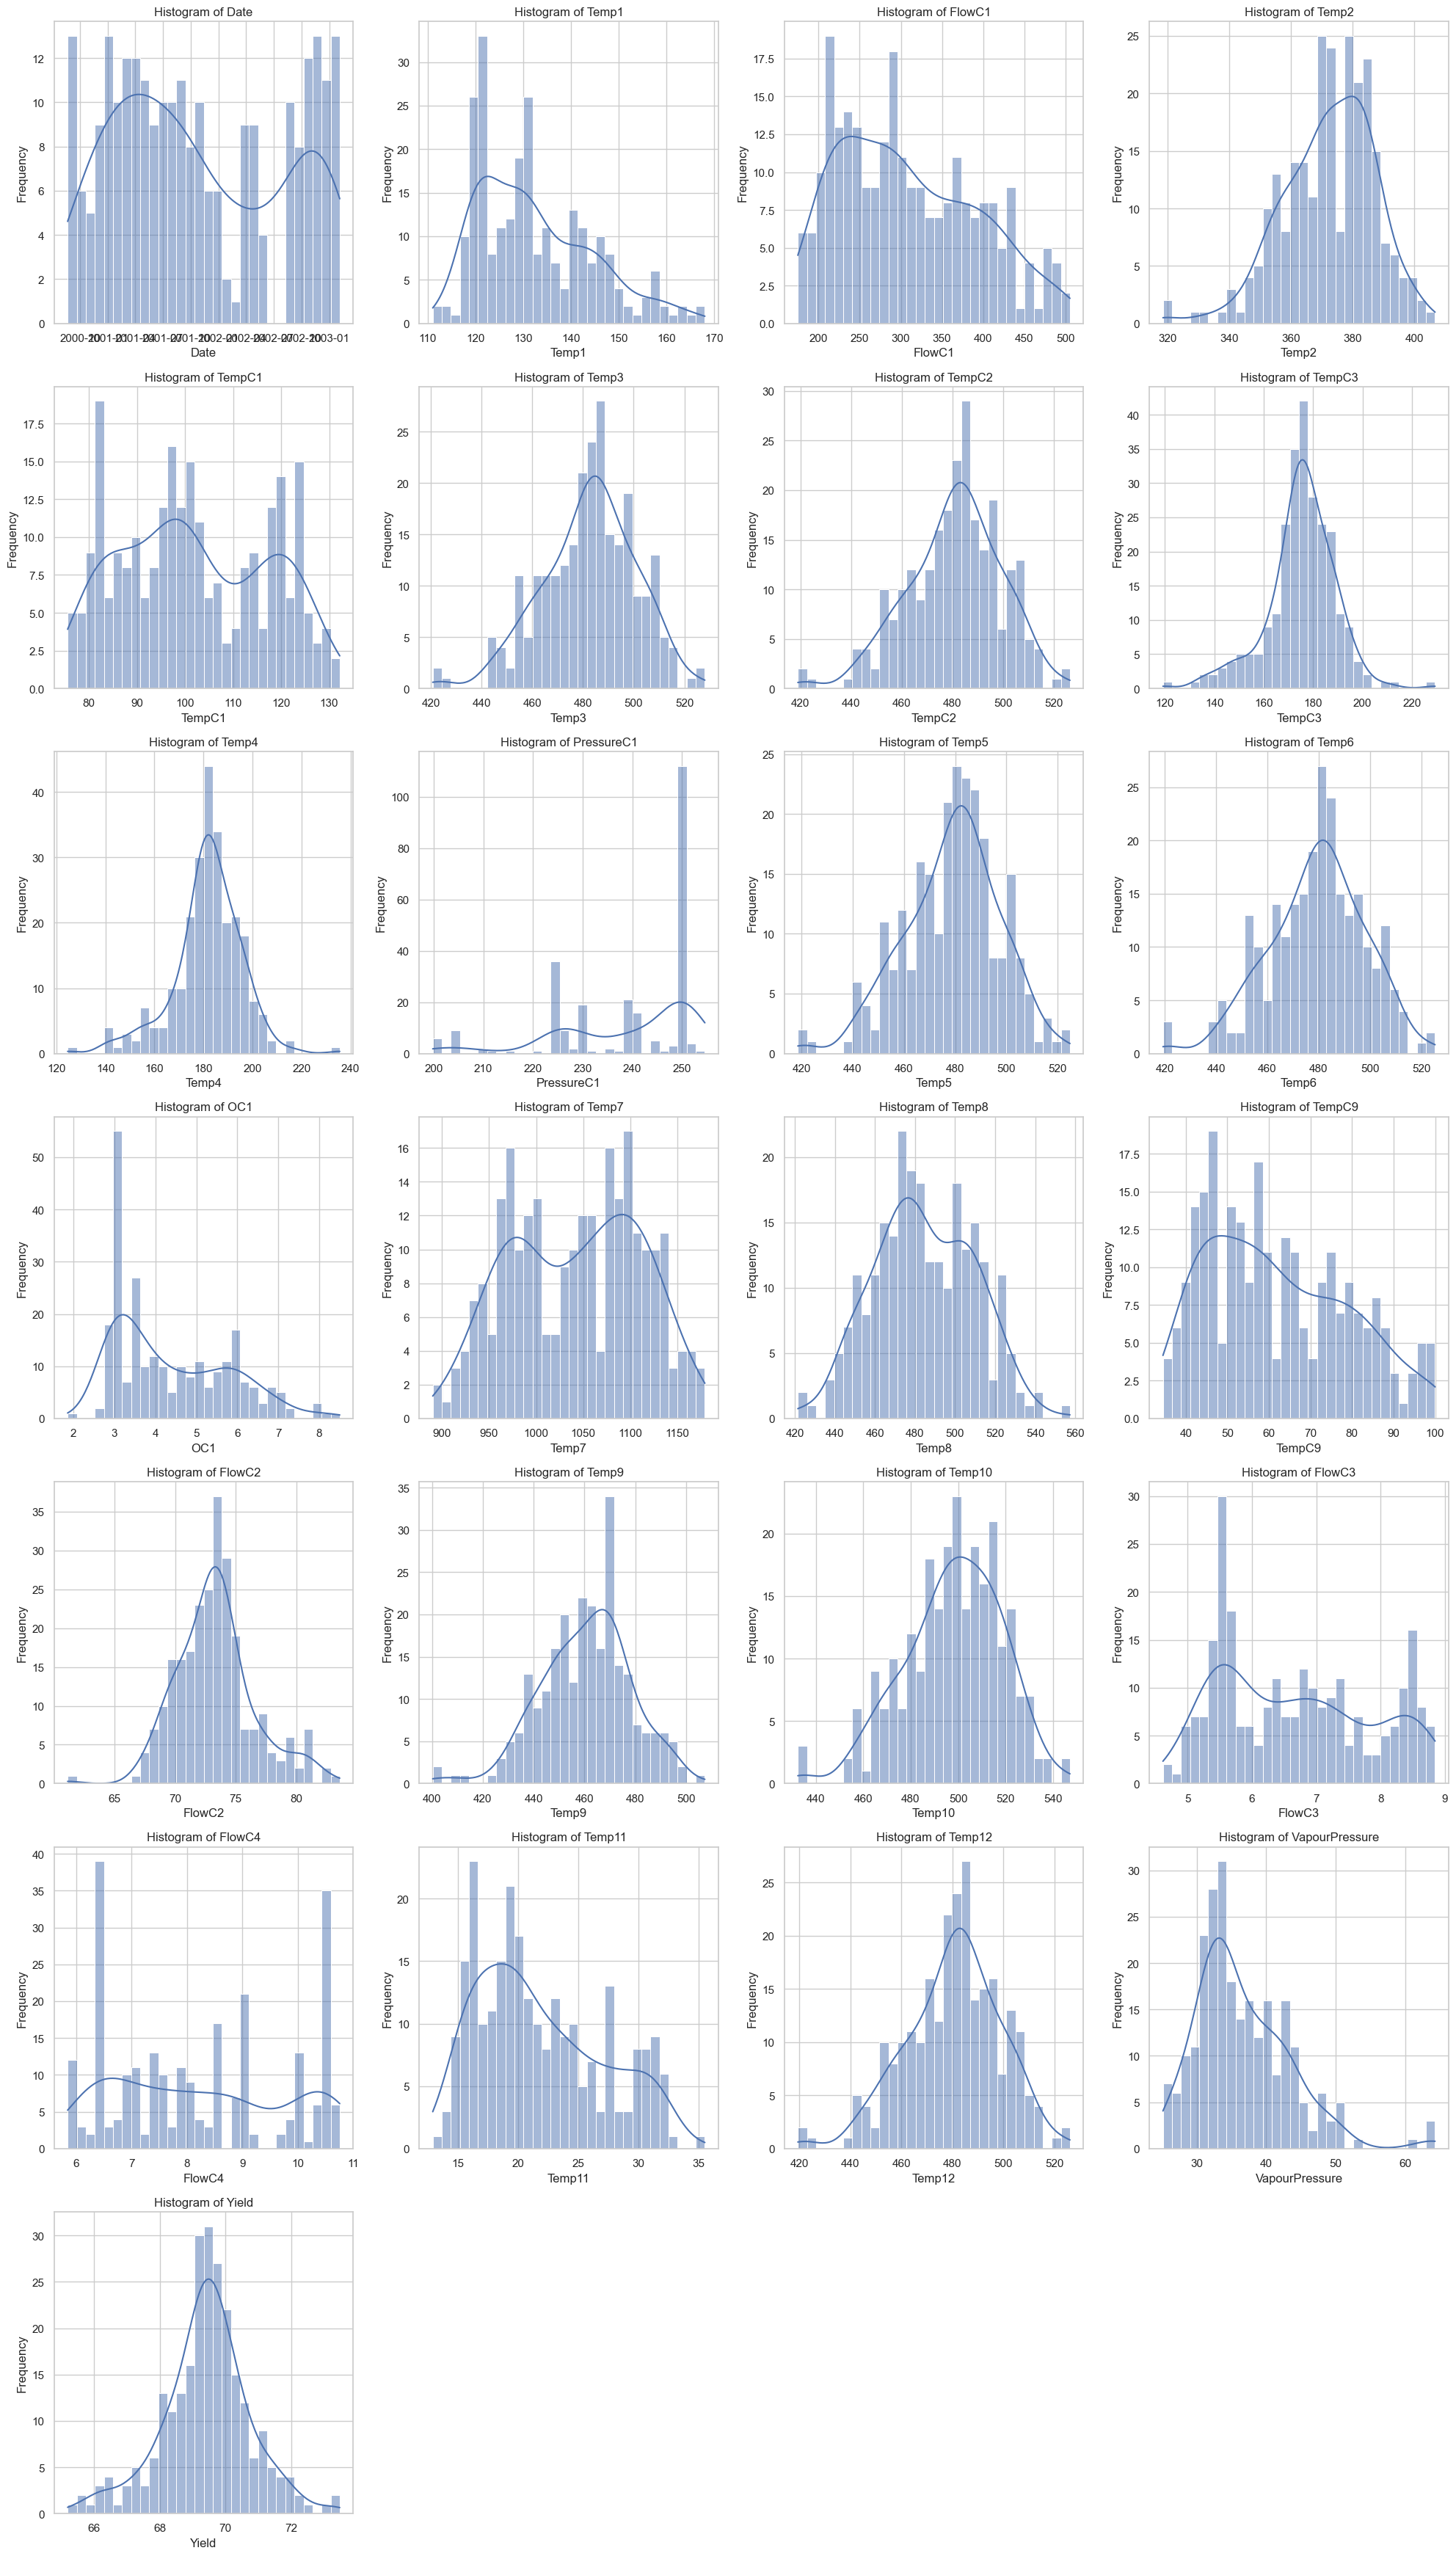

In [93]:
# Set visualization style
sns.set(style="whitegrid")

# Plot histograms for all columns
columns_to_plot = df.columns  # Use all columns
num_cols = len(columns_to_plot)

# Calculate the number of rows and columns for the grid
num_rows = (num_cols // 4) + 1  # 4 columns per row
plt.figure(figsize=(20, 5 * num_rows))  # Adjust figure size based on the number of rows

# Create subplots
for i, col in enumerate(columns_to_plot):
    plt.subplot(num_rows, 4, i + 1)  # Dynamic grid size
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [94]:
# Drop columns
df.drop(columns=['Date'], inplace=True)

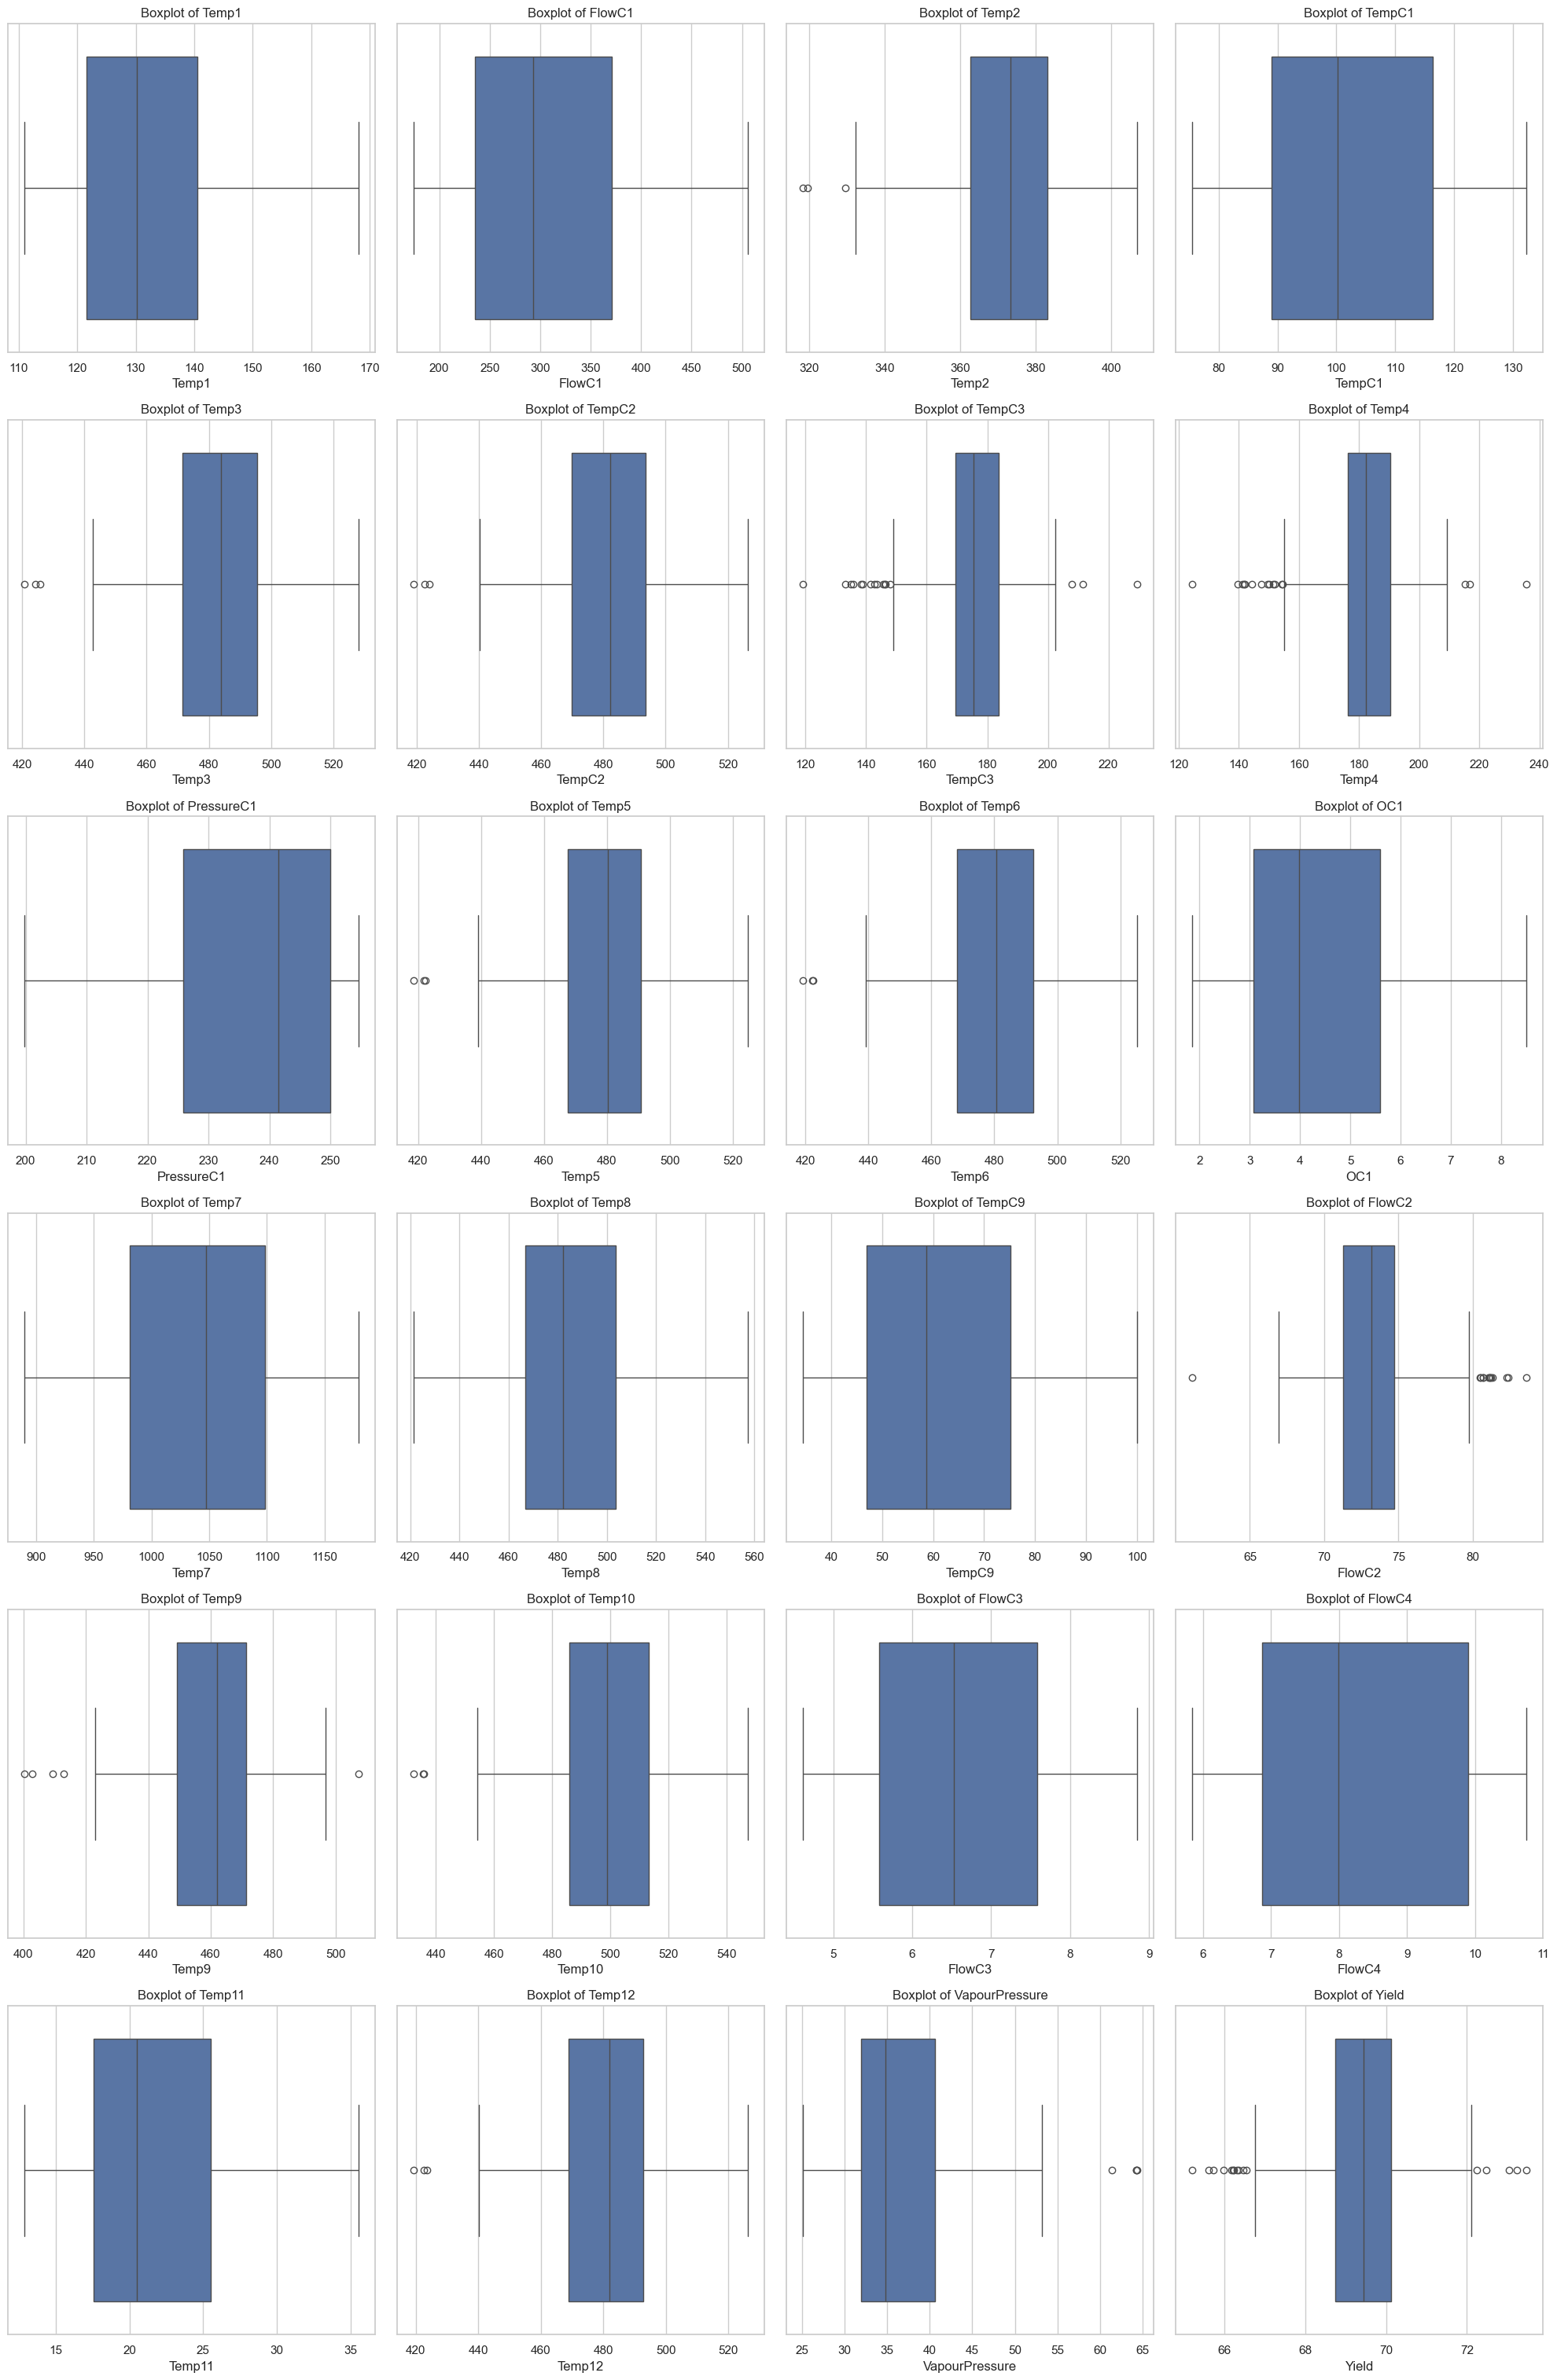

In [95]:
# Set visualization style
sns.set(style="whitegrid")

# Number of columns to plot (all columns)
num_columns_to_plot = len(df.columns)
columns_to_plot = df.columns

# Calculate the number of rows and columns for the grid
num_cols_per_row = 4  # Number of columns per row
num_rows = (num_columns_to_plot // num_cols_per_row) + 1  # Number of rows needed

# Set figure size dynamically based on the number of rows
plt.figure(figsize=(20, 5 * num_rows))

# Create subplots
for i, col in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols_per_row, i + 1)  # Dynamic grid size
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [96]:
# Handle outliers (example: cap at 1st and 99th percentiles)
for col in df.columns[:13]:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower_bound, upper_bound)

## Verify the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temp1           253 non-null    float64
 1   FlowC1          253 non-null    float64
 2   Temp2           253 non-null    float64
 3   TempC1          253 non-null    float64
 4   Temp3           253 non-null    float64
 5   TempC2          253 non-null    float64
 6   TempC3          253 non-null    float64
 7   Temp4           253 non-null    float64
 8   PressureC1      253 non-null    float64
 9   Temp5           253 non-null    float64
 10  Temp6           253 non-null    float64
 11  OC1             253 non-null    float64
 12  Temp7           253 non-null    float64
 13  Temp8           253 non-null    float64
 14  TempC9          253 non-null    float64
 15  FlowC2          253 non-null    float64
 16  Temp9           253 non-null    float64
 17  Temp10          253 non-null    flo

In [97]:
df.to_csv('C:/Users/mjkipsz2/OneDrive - The University of Manchester/Desktop/distillation_colum_yield/data/clean_data.csv', index=False)